# 🎰 Reinforcement Learning Mini-Project: Multi-Armed Bandit

## 🤔 What is this project about?

Welcome! Today, we're going to solve a classic Reinforcement Learning (RL) problem: the **Multi-Armed Bandit**.

**Imagine this:** You're in a casino facing a row of slot machines ("one-armed bandits"). 🎰🎰🎰🎰🎰

*   Each machine gives a random reward when you play it.
*   **Some machines are better than others.**
*   **You don't know which ones are better!**

**Your Goal:** Maximize your total reward after 1000 pulls.

**Your Dilemma (The Big RL Idea!):**
*   **🤔 Exploration:** Try a new machine. It might be amazing... or terrible!
*   **💰 Exploitation:** Play the machine that has given you the most money so far.

How do you balance trying new things (**Exploration**) and using what you know works (**Exploitation**)? Let's find out!

## 1: Importing Our Tools

In [30]:
# 📦 Importing our Toolbox
import numpy as np   # For all our math needs
import matplotlib.pyplot as plt # For creating graphs and charts
import seaborn as sns # For making those graphs pretty!

# This magic command makes our plots appear inside the notebook
%matplotlib inline

# Let's set a random seed. This is like fixing the casino's luck so we get the same results every time we run this! 🎲
np.random.seed(42)

print("✅ All tools imported successfully!")

✅ All tools imported successfully!


## 2: 🏗️ Building Our Casino

Let's create our 5 slot machines. Each machine has a secret "true average reward". Our agent doesn't know this! We have to discover it through play.

In code, we'll model each machine's payout using a normal distribution. A better machine has a higher average (`mean`) reward.

In [31]:
# 🎰 Create our bandit machines with their SECRET true average rewards.
bandit_true_means = [1.5, 2.5, 3.5, 4.5, 5.5] # Machine #4 (index 3) is the best!

print("The SECRET average reward for each bandit:", bandit_true_means)
print(f"🔍 Psst! The best machine is Bandit #{np.argmax(bandit_true_means)} with a mean reward of {np.max(bandit_true_means)}")

The SECRET average reward for each bandit: [1.5, 2.5, 3.5, 4.5, 5.5]
🔍 Psst! The best machine is Bandit #4 with a mean reward of 5.5


## 3: 👐 Pulling a Lever

We need a function that simulates pulling the arm of a chosen machine. It will return a reward based on that machine's secret average, plus some random noise (because luck is involved!).

In [32]:
# Function to pull a bandit arm
def pull_arm(bandit_index):
    """
    Simulates pulling the arm of a slot machine.
    The reward is based on the true mean of that bandit, with some random noise.
    """
    true_mean = bandit_true_means[bandit_index]
    # The reward is the true mean + some random noise
    reward = np.random.randn() + true_mean
    return reward

# Let's test it! Pull the best machine 3 times.
print("Testing the best machine (Bandit #3):")
for i in range(3):
    reward = pull_arm(3) # Index 3 is the 4th machine
    print(f"Pull {i+1}: Reward = {reward:.2f}")
# You'll see values around 4.5 (e.g., 3.82, 5.13, 4.27)

Testing the best machine (Bandit #3):
Pull 1: Reward = 5.00
Pull 2: Reward = 4.36
Pull 3: Reward = 5.15


## 4: 🧠 The Agent's Brain: The ε-Greedy Strategy

This is the core of our RL algorithm! Our agent needs to:
1.  **Keep track** of what it *thinks* each machine is worth.
2.  **Decide** between exploration and exploitation.
3.  **Learn** from the rewards it gets.

We'll use these variables:
*   `Q_values`: Our estimated average reward for each machine. We start knowing nothing (all zeros).
*   `action_count`: How many times we've played each machine.
*   `epsilon (ε)`: Our exploration rate. If `ε = 0.1`, we explore **10%** of the time.

In [33]:
# 🧠 Initialize the agent's brain. It knows nothing!
num_bandits = len(bandit_true_means)
Q_values = np.zeros(num_bandits)  # Estimated value of each bandit
action_count = np.zeros(num_bandits)  # Count of pulls per bandit
total_reward = 0
rewards_history = [] # To store the reward at each step
actions_history = [] # To store the action at each step

# ⚖️ Set the exploration rate. Try changing this later (0.0, 0.5, 1.0) to see what happens!
epsilon = 0.1

# 🎯 Number of pulls (timesteps)
num_pulls = 1000

print("🤖 Agent's brain initialized. Starting the experiment...")

🤖 Agent's brain initialized. Starting the experiment...


## 5: The Main Learning Loop


In [34]:
# 🔁 The Main Learning Loop
for i in range(num_pulls):
    
    # 1. EXPLORATION vs. EXPLOITATION DECISION
    if np.random.random() < epsilon:
        # 🧭 EXPLORE: Choose a random action
        chosen_bandit = np.random.randint(num_bandits)
        decision_type = "Exploring"
    else:
        # 🏆 EXPLOIT: Choose the best-known action
        chosen_bandit = np.argmax(Q_values)
        decision_type = "Exploiting"
    
    # 2. ACTION: Pull the chosen bandit's arm
    reward = pull_arm(chosen_bandit)
    total_reward += reward
    rewards_history.append(reward)
    actions_history.append(chosen_bandit)
    
    # 3. LEARNING: Update the Q-value for the chosen bandit
    # Simple formula: NewEstimate = OldEstimate + (1/StepSize) * (Target - OldEstimate)
    action_count[chosen_bandit] += 1
    Q_values[chosen_bandit] = Q_values[chosen_bandit] + (1 / action_count[chosen_bandit]) * (reward - Q_values[chosen_bandit])
    
    # Print progress every 200 pulls
    if i % 200 == 0:
        print(f"Pull {i:4d}: [{decision_type:10s}] Chose Bandit #{chosen_bandit}. Got reward: {reward:5.2f}")

# 🏁 Experiment Complete!
print("\n✅ Experiment complete!")
print(f"Total reward earned: {total_reward:.2f}")
print("Agent's final Q-value estimates:", [f'{q:.2f}' for q in Q_values])

Pull    0: [Exploiting] Chose Bandit #0. Got reward:  3.02
Pull  200: [Exploring ] Chose Bandit #2. Got reward:  3.51
Pull  400: [Exploiting] Chose Bandit #4. Got reward:  5.60
Pull  600: [Exploiting] Chose Bandit #4. Got reward:  5.42
Pull  800: [Exploiting] Chose Bandit #4. Got reward:  5.88

✅ Experiment complete!
Total reward earned: 5206.11
Agent's final Q-value estimates: ['1.44', '2.52', '3.55', '4.41', '5.54']


## 6: 📈 Results: Did the Agent Learn?

Let's visualize the results to see if our agent got smarter over time.

### 📊 Plot 1: The Learning Curve


/opt/anaconda3/envs/datasci_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


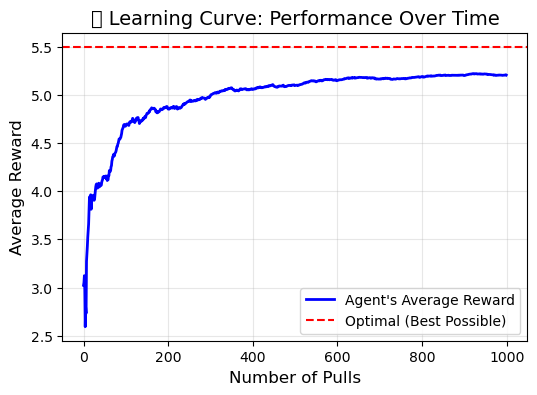

📈 The Learning Curve shows our agent's average reward per pull over time.
   If it slopes upward and approaches the red dashed line, the agent is LEARNING!


In [35]:
# This shows our average performance over time. A learning agent should get better!

plt.figure(figsize=(6, 4))
cumulative_average = np.cumsum(rewards_history) / (np.arange(num_pulls) + 1)
plt.plot(cumulative_average, label='Agent\'s Average Reward', linewidth=2, color='blue')
plt.axhline(y=np.max(bandit_true_means), color='r', linestyle='--', label='Optimal (Best Possible)')
plt.xlabel('Number of Pulls', fontsize=12)
plt.ylabel('Average Reward', fontsize=12)
plt.title('🚀 Learning Curve: Performance Over Time', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Analysis:
print("📈 The Learning Curve shows our agent's average reward per pull over time.")
print("   If it slopes upward and approaches the red dashed line, the agent is LEARNING!")

### Plot 2: Visualizing the Results - Estimates vs. Reality

/opt/anaconda3/envs/datasci_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


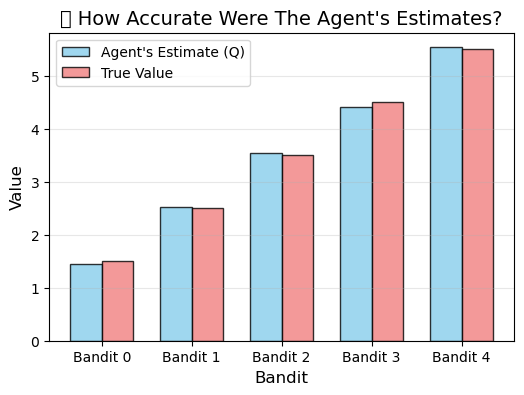

📊 This chart compares the agent's final estimates (blue) to the secret true values (red).
   If the blue bars are close to the red bars, especially for the best machine, the agent learned well!


In [36]:
# 📊 Plot 2: Estimates vs. True Values
# Did the agent accurately figure out which machine was best?

plt.figure(figsize=(6, 4))
x_pos = np.arange(num_bandits)
width = 0.35  # Width of the bars

plt.bar(x_pos - width/2, Q_values, width, label='Agent\'s Estimate (Q)', alpha=0.8, color='skyblue', edgecolor='black')
plt.bar(x_pos + width/2, bandit_true_means, width, label='True Value', alpha=0.8, color='lightcoral', edgecolor='black')

plt.xlabel('Bandit', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.title('✅ How Accurate Were The Agent\'s Estimates?', fontsize=14)
plt.xticks(x_pos, [f'Bandit {i}' for i in range(num_bandits)])
plt.legend()
plt.grid(True, axis='y', alpha=0.3)
plt.show()

# Analysis:
print("📊 This chart compares the agent's final estimates (blue) to the secret true values (red).")
print("   If the blue bars are close to the red bars, especially for the best machine, the agent learned well!")

### 📊 Plot 3: Which machine did the agent prefer?


/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_410/244216071.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=actions_history, palette="viridis")
/opt/anaconda3/envs/datasci_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


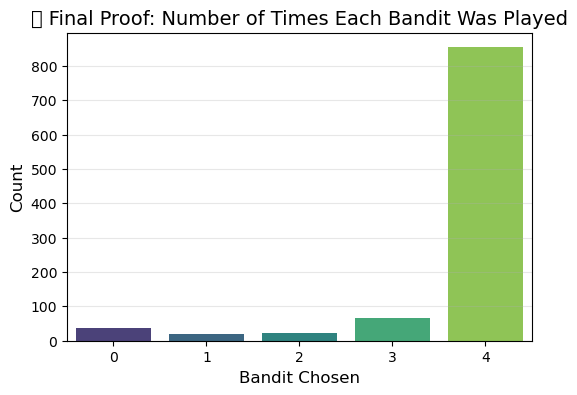

🎯 This chart shows how many times each machine was played.
   If Bandit #4 (the best one) has the highest bar, the agent successfully found it!


In [37]:
# Proof of learning: it should choose the best machine most often.

plt.figure(figsize=(6, 4))
sns.countplot(x=actions_history, palette="viridis")
plt.xlabel('Bandit Chosen', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('🎯 Final Proof: Number of Times Each Bandit Was Played', fontsize=14)
plt.grid(True, axis='y', alpha=0.3)
plt.show()

# Analysis:
best_bandit = np.argmax(bandit_true_means)
print(f"🎯 This chart shows how many times each machine was played.")
print(f"   If Bandit #{best_bandit} (the best one) has the highest bar, the agent successfully found it!")

## 🎓 Conclusion

**We did it!** We built a simple Reinforcement Learning agent that learned to solve the Multi-Armed Bandit problem.

**Key Takeaways:**
*   ✅ **Reinforcement Learning** is about learning the best actions from rewards and punishments.
*   ✅ The **Exploration vs. Exploitation** trade-off is a fundamental challenge in RL.
*   ✅ The **ε-Greedy** strategy is a simple but powerful way to balance this trade-off.
*   ✅ Our agent successfully **learned** which machine was best and **maximized** its rewards.

## 🔬 Try It Yourself!

The best way to learn is to experiment! Try changing the `epsilon` value in Cell 5 and run the code again:
*   `epsilon = 0.0` (Always Exploit): The agent gets stuck on the first decent machine it finds.
*   `epsilon = 1.0` (Always Explore): The agent never learns, it just plays randomly forever.
*   `epsilon = 0.2`: It explores more. Does it find the best machine faster or slower?

**Thank you for following along!** 🙏

------
## 🔧 Modular Experiment Setup 2nd setup

This notebook is now organized into functions. You can easily run experiments by changing the parameters below and calling `run_bandit_experiment()`.

**Key Parameters to Play With:**
*   `epsilon`: Exploration rate (0.0 to 1.0)
*   `num_bandits`: Number of slot machines
*   `num_pulls`: How many times to play
*   `seed`: To get reproducible results

## 📦 Importing our Toolbox (Import Tools and Define Core Functions)

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 🎰 Function 1: Create the Bandit Casino
def create_bandits(num_bandits=5, base_mean=1.0, seed=None):
    """
    Creates a set of bandit machines with different average rewards.
    
    Parameters:
    num_bandits (int): How many slot machines to create
    base_mean (float): The starting mean reward. Each bandit will be better than the last.
    seed (int): For reproducible results
    
    Returns:
    list: The true mean reward for each bandit
    """
    if seed is not None:
        np.random.seed(seed)
    
    # Create bandits with increasing means (e.g., [1.5, 2.5, 3.5, 4.5, 5.5])
    bandit_true_means = [base_mean + i for i in range(num_bandits)]
    return bandit_true_means

# 👐 Function 2: Pull a Bandit Arm
def pull_arm(bandit_index, bandit_true_means, noise_level=1.0):
    """
    Simulates pulling the arm of a slot machine.
    
    Parameters:
    bandit_index (int): Which machine to play (0 to num_bandits-1)
    bandit_true_means (list): The true average rewards for each bandit
    noise_level (float): How much random variation to add
    
    Returns:
    float: The reward received
    """
    true_mean = bandit_true_means[bandit_index]
    reward = np.random.randn() * noise_level + true_mean
    return reward

print("✅ Core functions defined successfully!")

✅ Core functions defined successfully!


## Define the ε-Greedy Algorithm Function

In [39]:
# 🧠 Function 3: Run the ε-Greedy Algorithm
def run_epsilon_greedy(bandit_true_means, epsilon=0.1, num_pulls=1000, seed=None):
    """
    Runs the complete ε-Greedy algorithm experiment.
    
    Parameters:
    bandit_true_means (list): True average rewards for each bandit
    epsilon (float): Exploration rate (0.0 to 1.0)
    num_pulls (int): Number of times to play
    seed (int): For reproducible results
    
    Returns:
    dict: All the results and history from the experiment
    """
    if seed is not None:
        np.random.seed(seed)
    
    num_bandits = len(bandit_true_means)
    
    # Initialize the agent's knowledge
    Q_values = np.zeros(num_bandits)  # Estimated value of each bandit
    action_count = np.zeros(num_bandits)  # Count of pulls per bandit
    total_reward = 0
    
    # History tracking
    rewards_history = []
    actions_history = []
    decision_types = []  # Track if each decision was exploration or exploitation
    
    print(f"🤖 Starting experiment with ε={epsilon}, {num_pulls} pulls...")
    
    # 🔁 Main Learning Loop
    for i in range(num_pulls):
        
        # 1. EXPLORATION vs. EXPLOITATION DECISION
        if np.random.random() < epsilon:
            chosen_bandit = np.random.randint(num_bandits)
            decision_type = "explore"
        else:
            chosen_bandit = np.argmax(Q_values)
            decision_type = "exploit"
        
        # 2. ACTION: Pull the chosen bandit's arm
        reward = pull_arm(chosen_bandit, bandit_true_means)
        total_reward += reward
        
        # 3. UPDATE: Learn from the experience
        action_count[chosen_bandit] += 1
        Q_values[chosen_bandit] += (1 / action_count[chosen_bandit]) * (reward - Q_values[chosen_bandit])
        
        # Store history
        rewards_history.append(reward)
        actions_history.append(chosen_bandit)
        decision_types.append(decision_type)
    
    # Prepare results
    results = {
        'Q_values': Q_values,
        'action_count': action_count,
        'total_reward': total_reward,
        'rewards_history': np.array(rewards_history),
        'actions_history': np.array(actions_history),
        'decision_types': decision_types,
        'bandit_true_means': bandit_true_means,
        'epsilon': epsilon,
        'num_pulls': num_pulls
    }
    
    print(f"✅ Experiment complete! Total reward: {total_reward:.2f}")
    return results

print("✅ ε-Greedy algorithm function defined!")

✅ ε-Greedy algorithm function defined!


## 📊 Function 4: Create Visualization Plots

In [40]:
def plot_results(results):
    """
    Creates three visualization plots from the experiment results.
    
    Parameters:
    results (dict): The results dictionary from run_epsilon_greedy()
    """
    # Extract data from results
    rewards_history = results['rewards_history']
    actions_history = results['actions_history']
    Q_values = results['Q_values']
    bandit_true_means = results['bandit_true_means']
    epsilon = results['epsilon']
    num_pulls = results['num_pulls']
    
    num_bandits = len(bandit_true_means)
    
    # Create figure with 3 subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'🎰 Multi-Armed Bandit Results (ε={epsilon}, N={num_pulls})', fontsize=16)
    
    # 📈 Plot 1: Learning Curve
    cumulative_average = np.cumsum(rewards_history) / (np.arange(num_pulls) + 1)
    axes[0, 0].plot(cumulative_average, label='Agent\'s Performance', linewidth=2, color='blue')
    axes[0, 0].axhline(y=np.max(bandit_true_means), color='r', linestyle='--', 
                      label=f'Optimal (Bandit #{np.argmax(bandit_true_means)})')
    axes[0, 0].set_xlabel('Number of Pulls')
    axes[0, 0].set_ylabel('Average Reward')
    axes[0, 0].set_title('🚀 Learning Curve: Performance Over Time')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # 📊 Plot 2: Estimates vs. True Values
    x_pos = np.arange(num_bandits)
    width = 0.35
    axes[0, 1].bar(x_pos - width/2, Q_values, width, label='Agent\'s Estimate', 
                  alpha=0.8, color='skyblue', edgecolor='black')
    axes[0, 1].bar(x_pos + width/2, bandit_true_means, width, label='True Value', 
                  alpha=0.8, color='lightcoral', edgecolor='black')
    axes[0, 1].set_xlabel('Bandit')
    axes[0, 1].set_ylabel('Value')
    axes[0, 1].set_title('✅ Accuracy of Agent\'s Estimates')
    axes[0, 1].set_xticks(x_pos)
    axes[0, 1].set_xticklabels([f'Bandit {i}' for i in range(num_bandits)])
    axes[0, 1].legend()
    axes[0, 1].grid(True, axis='y', alpha=0.3)
    
    # 📊 Plot 3: Action Choices
    sns.countplot(x=actions_history, ax=axes[1, 0], palette="viridis")
    axes[1, 0].set_xlabel('Bandit Chosen')
    axes[1, 0].set_ylabel('Count')
    axes[1, 0].set_title('🎯 Number of Times Each Bandit Was Played')
    axes[1, 0].grid(True, axis='y', alpha=0.3)
    
    # 📊 Plot 4: Exploration vs. Exploitation
    decision_types = results['decision_types']
    explore_count = decision_types.count('explore')
    exploit_count = decision_types.count('exploit')
    
    axes[1, 1].pie([explore_count, exploit_count], 
                  labels=['Exploration', 'Exploitation'], 
                  autopct='%1.1f%%', 
                  colors=['lightblue', 'lightgreen'],
                  startangle=90)
    axes[1, 1].set_title('⚖️ Exploration vs. Exploitation Balance')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    best_bandit = np.argmax(bandit_true_means)
    best_choice_percentage = (actions_history == best_bandit).mean() * 100
    
    print("📊 EXPERIMENT SUMMARY:")
    print(f"   Total Reward: {results['total_reward']:.2f}")
    print(f"   Exploration Rate: {epsilon}")
    print(f"   Exploration Decisions: {explore_count} ({explore_count/num_pulls*100:.1f}%)")
    print(f"   Best Bandit Found: Bandit #{np.argmax(Q_values)}")
    print(f"   Best Bandit Choice: {best_choice_percentage:.1f}% of pulls")
    print(f"   Final Q-value Estimates: {[f'{q:.2f}' for q in Q_values]}")

print("✅ Visualization functions defined!")

✅ Visualization functions defined!


## Master Function to Run Complete Experiment

In [41]:
# 🧪 Function 5: Master Experiment Runner
def run_bandit_experiment(num_bandits=5, base_mean=1.0, epsilon=0.1, 
                         num_pulls=1000, noise_level=1.0, seed=42):
    """
    Runs a complete bandit experiment from start to finish.
    
    Parameters:
    num_bandits (int): Number of slot machines
    base_mean (float): Base reward mean for the worst bandit
    epsilon (float): Exploration rate (0.0 to 1.0)
    num_pulls (int): Number of times to play
    noise_level (float): Amount of randomness in rewards
    seed (int): For reproducible results
    
    Returns:
    dict: Complete experiment results
    """
    print("=" * 60)
    print(f"🧪 STARTING NEW EXPERIMENT")
    print(f"   Bandits: {num_bandits}, ε: {epsilon}, Pulls: {num_pulls}")
    print("=" * 60)
    
    # Step 1: Create the bandits
    bandit_true_means = create_bandits(num_bandits, base_mean, seed)
    print(f"🎰 Created {num_bandits} bandits with means: {[f'{m:.1f}' for m in bandit_true_means]}")
    print(f"   Best bandit is #{np.argmax(bandit_true_means)} with mean {np.max(bandit_true_means):.1f}")
    
    # Step 2: Run the algorithm
    results = run_epsilon_greedy(bandit_true_means, epsilon, num_pulls, seed)
    
    # Step 3: Plot the results
    plot_results(results)
    
    return results

print("✅ Master experiment function defined!")

✅ Master experiment function defined!


## 🧪 Time to Experiment!

Now you can easily run different experiments by changing the parameters below. Try different values to see how they affect the results!

🔹 EXPERIMENT 1: Balanced Exploration (ε=0.1)
🧪 STARTING NEW EXPERIMENT
   Bandits: 5, ε: 0.1, Pulls: 1000
🎰 Created 5 bandits with means: ['1.0', '2.0', '3.0', '4.0', '5.0']
   Best bandit is #4 with mean 5.0
🤖 Starting experiment with ε=0.1, 1000 pulls...
✅ Experiment complete! Total reward: 4760.97


/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_410/3082897386.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=actions_history, ax=axes[1, 0], palette="viridis")
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_410/3082897386.py:67: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_410/3082897386.py:67: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_410/3082897386.py:67: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_410/3082897386.py:67: UserWarning: Glyph 127920 (\N{SLOT MACHINE}

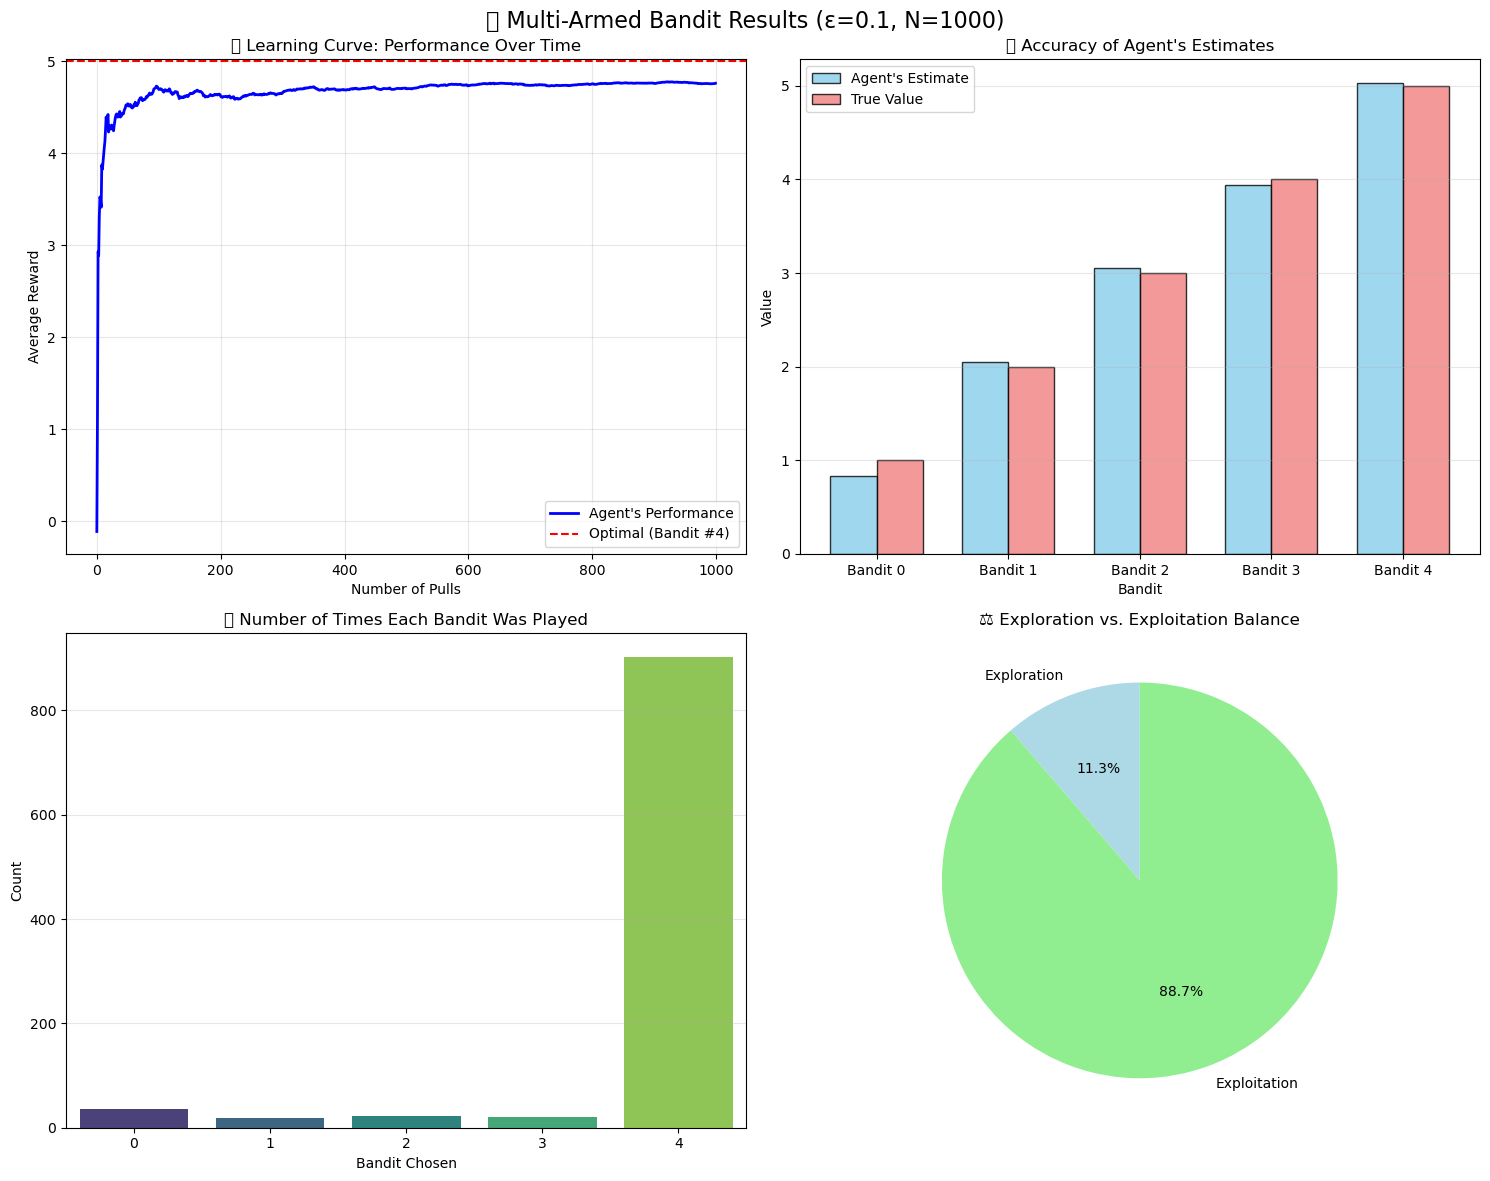

📊 EXPERIMENT SUMMARY:
   Total Reward: 4760.97
   Exploration Rate: 0.1
   Exploration Decisions: 113 (11.3%)
   Best Bandit Found: Bandit #4
   Best Bandit Choice: 90.3% of pulls
   Final Q-value Estimates: ['0.83', '2.05', '3.05', '3.94', '5.03']


In [42]:
# 🎯 EXPERIMENT 1: Default Settings (Good Balance)
print("🔹 EXPERIMENT 1: Balanced Exploration (ε=0.1)")
results1 = run_bandit_experiment(
    num_bandits=5,    # Number of slot machines
    base_mean=1.0,    # Mean reward for the worst bandit
    epsilon=0.1,      # Exploration rate - TRY CHANGING THIS!
    num_pulls=1000,   # Number of pulls
    seed=42           # For reproducible results
)



🔹 EXPERIMENT 2: Pure Exploitation (ε=0.0)
🧪 STARTING NEW EXPERIMENT
   Bandits: 5, ε: 0.0, Pulls: 1000
🎰 Created 5 bandits with means: ['1.0', '2.0', '3.0', '4.0', '5.0']
   Best bandit is #4 with mean 5.0
🤖 Starting experiment with ε=0.0, 1000 pulls...


/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_410/3082897386.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=actions_history, ax=axes[1, 0], palette="viridis")
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_410/3082897386.py:67: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_410/3082897386.py:67: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_410/3082897386.py:67: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_410/3082897386.py:67: UserWarning: Glyph 127920 (\N{SLOT MACHINE}

✅ Experiment complete! Total reward: 2010.90


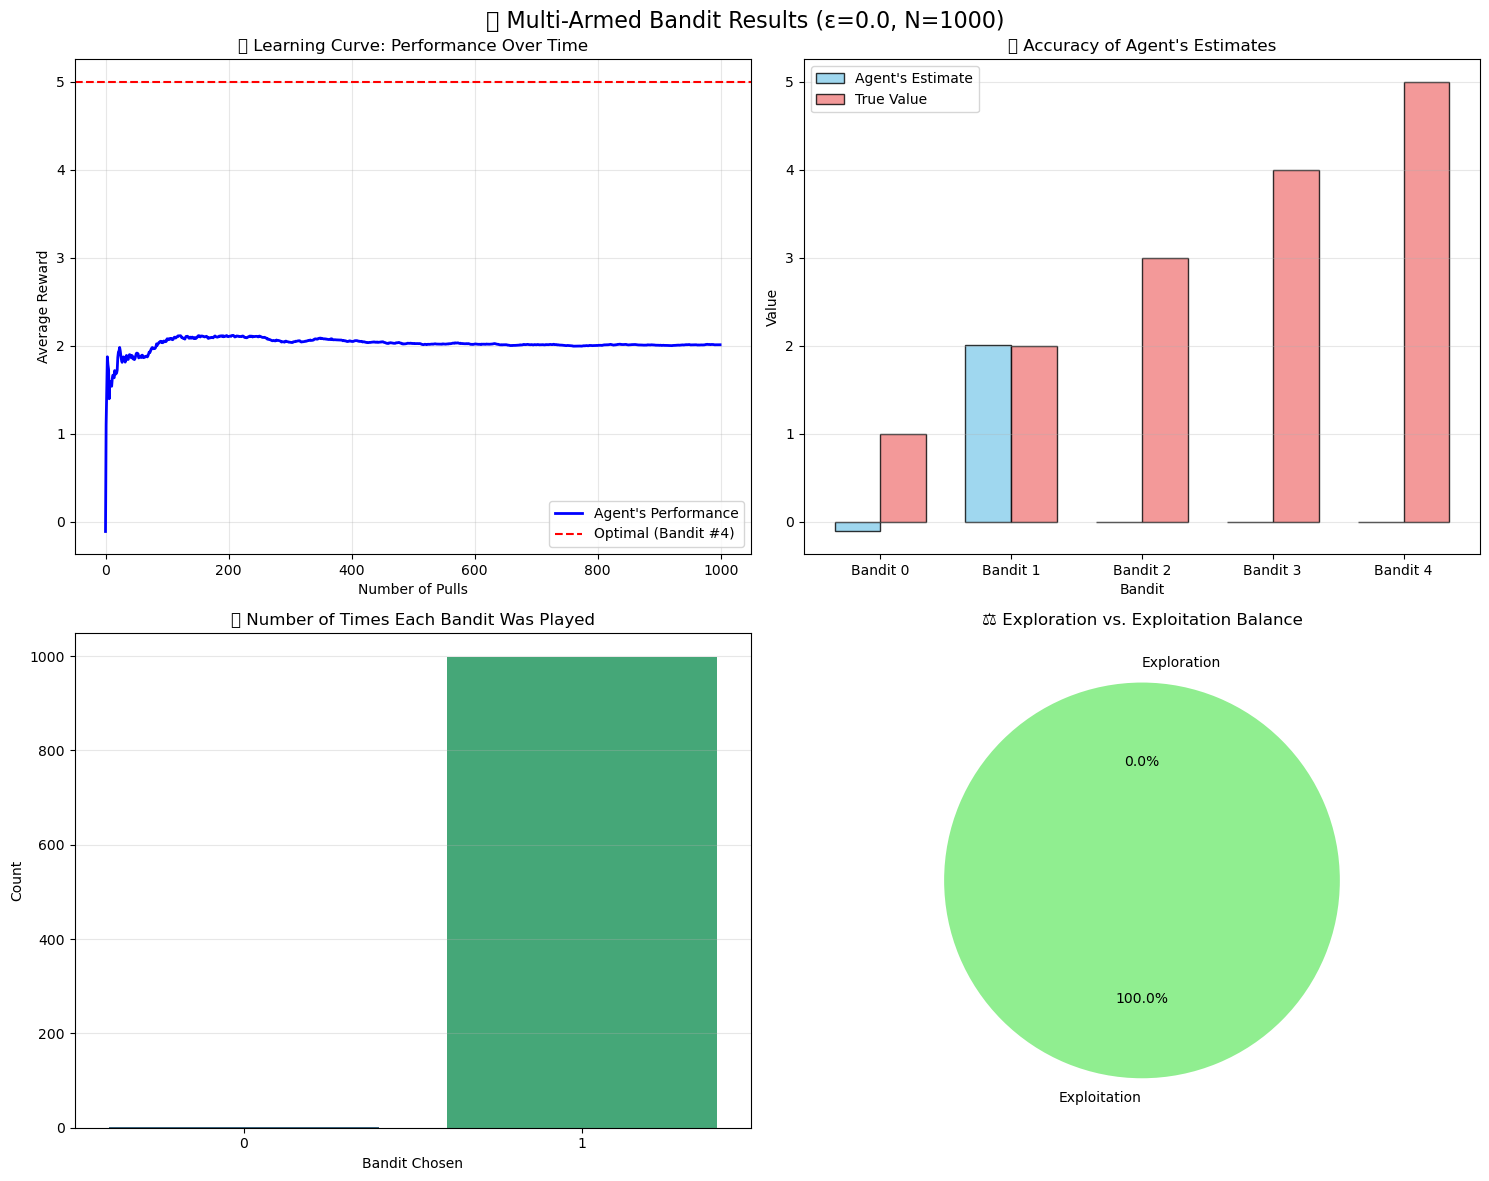

📊 EXPERIMENT SUMMARY:
   Total Reward: 2010.90
   Exploration Rate: 0.0
   Exploration Decisions: 0 (0.0%)
   Best Bandit Found: Bandit #1
   Best Bandit Choice: 0.0% of pulls
   Final Q-value Estimates: ['-0.11', '2.01', '0.00', '0.00', '0.00']


In [43]:
# 🎯 EXPERIMENT 2: Pure Exploitation (Always choose best known)
print("\n\n🔹 EXPERIMENT 2: Pure Exploitation (ε=0.0)")
results2 = run_bandit_experiment(
    num_bandits=5,
    base_mean=1.0,
    epsilon=0.0,      # NEVER explore!
    num_pulls=1000,
    seed=42
)



🔹 EXPERIMENT 3: Pure Exploration (ε=1.0)
🧪 STARTING NEW EXPERIMENT
   Bandits: 5, ε: 1.0, Pulls: 1000
🎰 Created 5 bandits with means: ['1.0', '2.0', '3.0', '4.0', '5.0']
   Best bandit is #4 with mean 5.0
🤖 Starting experiment with ε=1.0, 1000 pulls...
✅ Experiment complete! Total reward: 2936.00


/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_410/3082897386.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=actions_history, ax=axes[1, 0], palette="viridis")
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_410/3082897386.py:67: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_410/3082897386.py:67: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_410/3082897386.py:67: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_410/3082897386.py:67: UserWarning: Glyph 127920 (\N{SLOT MACHINE}

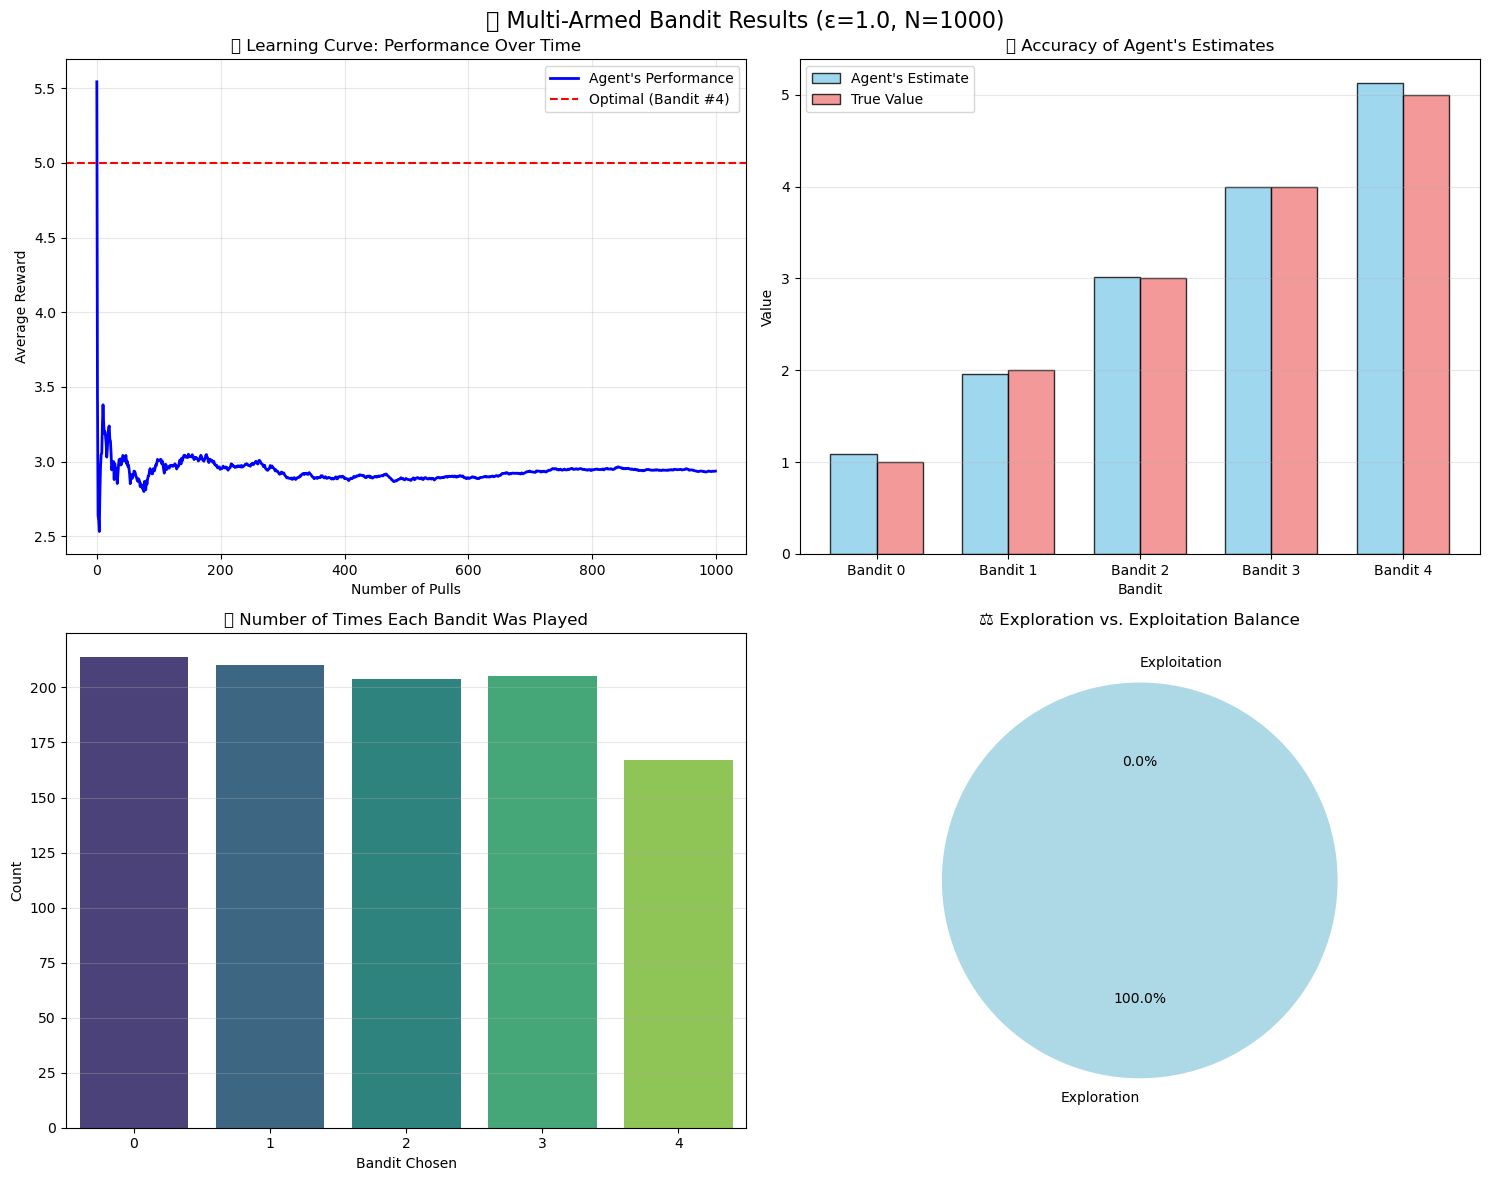

📊 EXPERIMENT SUMMARY:
   Total Reward: 2936.00
   Exploration Rate: 1.0
   Exploration Decisions: 1000 (100.0%)
   Best Bandit Found: Bandit #4
   Best Bandit Choice: 16.7% of pulls
   Final Q-value Estimates: ['1.08', '1.96', '3.02', '4.00', '5.13']


In [44]:
# 🎯 EXPERIMENT 3: Pure Exploration (Always choose random)
print("\n\n🔹 EXPERIMENT 3: Pure Exploration (ε=1.0)")
results3 = run_bandit_experiment(
    num_bandits=5,
    base_mean=1.0,
    epsilon=1.0,      # ALWAYS explore!
    num_pulls=1000,
    seed=42
)



🔹 EXPERIMENT 4: High Exploration (ε=0.3)
🧪 STARTING NEW EXPERIMENT
   Bandits: 5, ε: 0.3, Pulls: 1000
🎰 Created 5 bandits with means: ['1.0', '2.0', '3.0', '4.0', '5.0']
   Best bandit is #4 with mean 5.0
🤖 Starting experiment with ε=0.3, 1000 pulls...
✅ Experiment complete! Total reward: 4459.69


/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_410/3082897386.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=actions_history, ax=axes[1, 0], palette="viridis")
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_410/3082897386.py:67: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_410/3082897386.py:67: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_410/3082897386.py:67: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_410/3082897386.py:67: UserWarning: Glyph 127920 (\N{SLOT MACHINE}

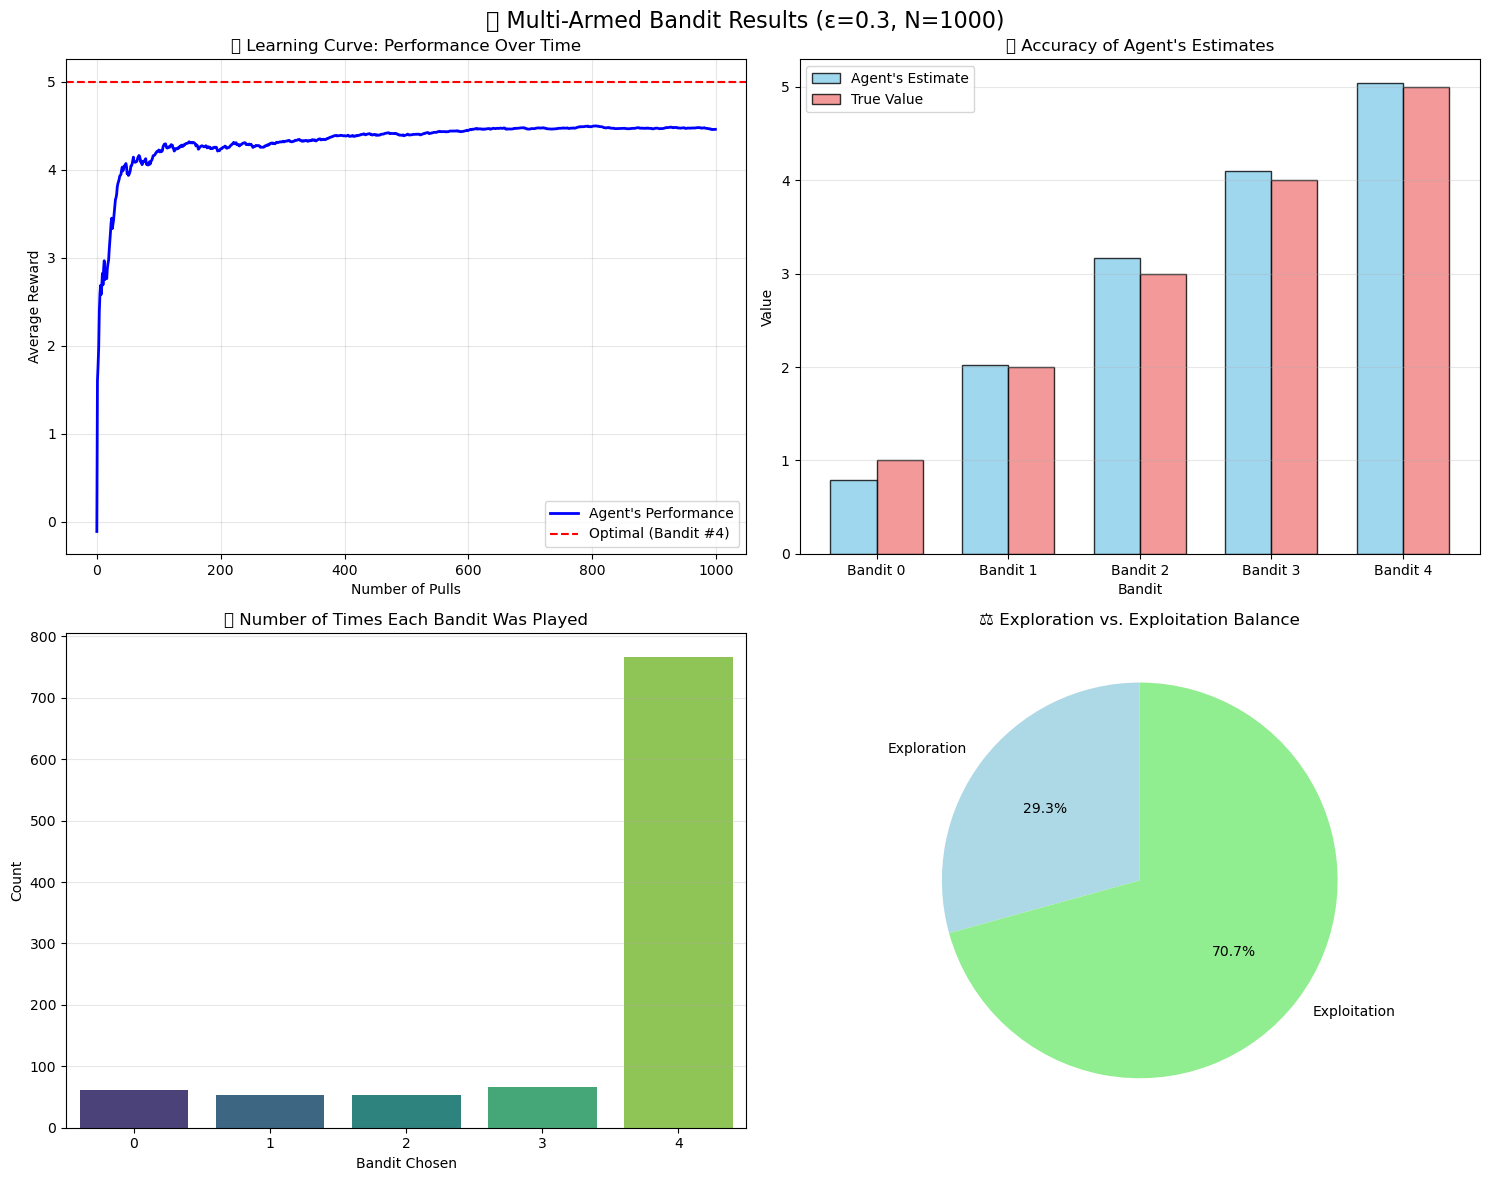

📊 EXPERIMENT SUMMARY:
   Total Reward: 4459.69
   Exploration Rate: 0.3
   Exploration Decisions: 293 (29.3%)
   Best Bandit Found: Bandit #4
   Best Bandit Choice: 76.7% of pulls
   Final Q-value Estimates: ['0.79', '2.03', '3.17', '4.10', '5.04']


In [45]:
# 🎯 EXPERIMENT 4: More Exploration
print("\n\n🔹 EXPERIMENT 4: High Exploration (ε=0.3)")
results4 = run_bandit_experiment(
    num_bandits=5,
    base_mean=1.0,
    epsilon=0.3,      # Explore 30% of the time
    num_pulls=1000,
    seed=42
)

/opt/anaconda3/envs/datasci_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


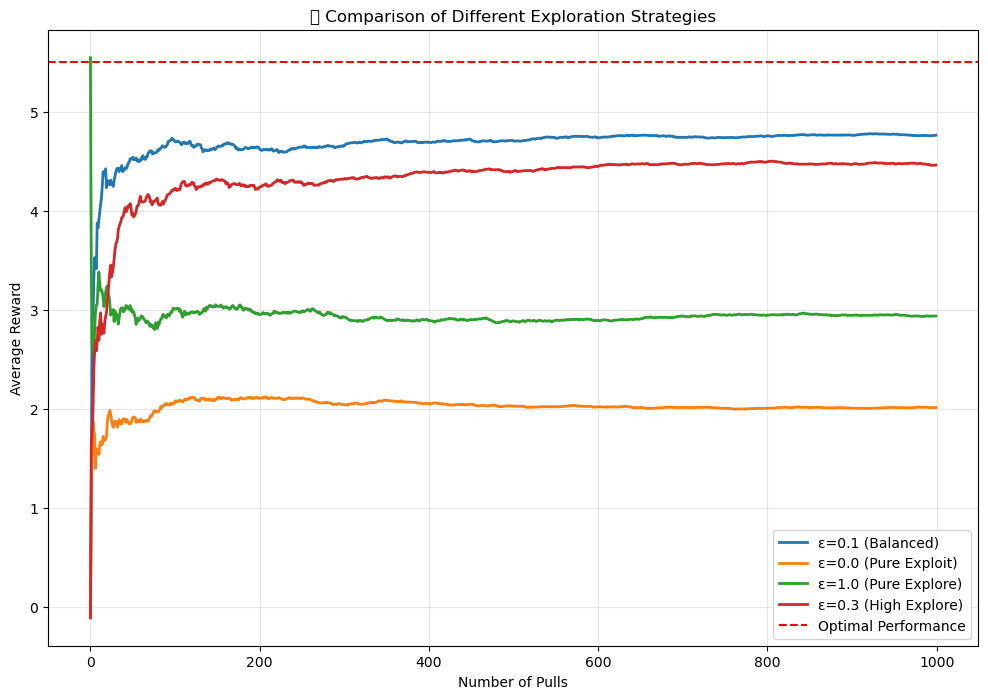

In [46]:
# 📈 Compare Results from Different Experiments
def compare_experiments(experiment_results_list, experiment_names):
    """
    Compares the learning curves of multiple experiments.
    """
    plt.figure(figsize=(12, 8))
    
    for i, results in enumerate(experiment_results_list):
        rewards = results['rewards_history']
        cumulative_avg = np.cumsum(rewards) / (np.arange(len(rewards)) + 1)
        plt.plot(cumulative_avg, label=experiment_names[i], linewidth=2)
    
    plt.axhline(y=5.5, color='r', linestyle='--', label='Optimal Performance')
    plt.xlabel('Number of Pulls')
    plt.ylabel('Average Reward')
    plt.title('📊 Comparison of Different Exploration Strategies')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Compare our experiments
experiments = [results1, results2, results3, results4]
names = ['ε=0.1 (Balanced)', 'ε=0.0 (Pure Exploit)', 'ε=1.0 (Pure Explore)', 'ε=0.3 (High Explore)']

compare_experiments(experiments, names)